## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor


## Getting the data 

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [5]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


## Data Analysis (EDA)


In [6]:
test.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

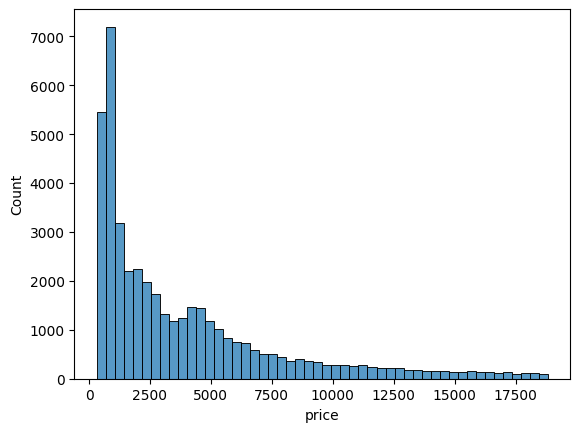

In [7]:
# Explore the distribution of the target variable (price)
sns.histplot(train["price"], bins=50)
plt.show()

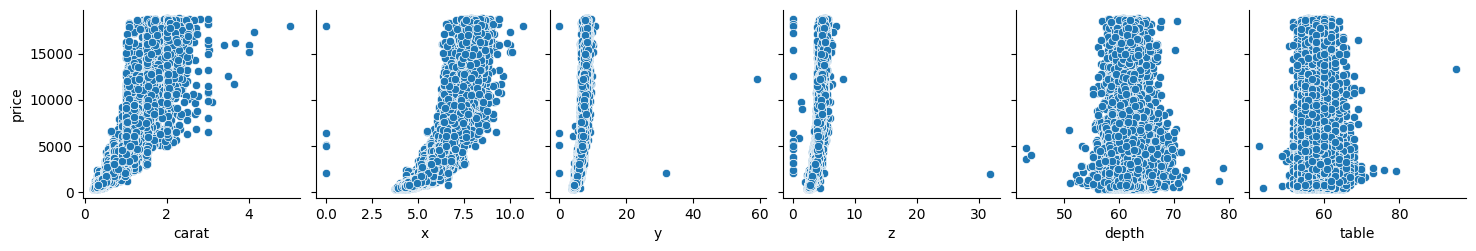

In [8]:
# Explore the relationship between price and other numerical features
sns.pairplot(train, x_vars=["carat", "x", "y", "z", "depth", "table"], y_vars=["price"])
plt.show()

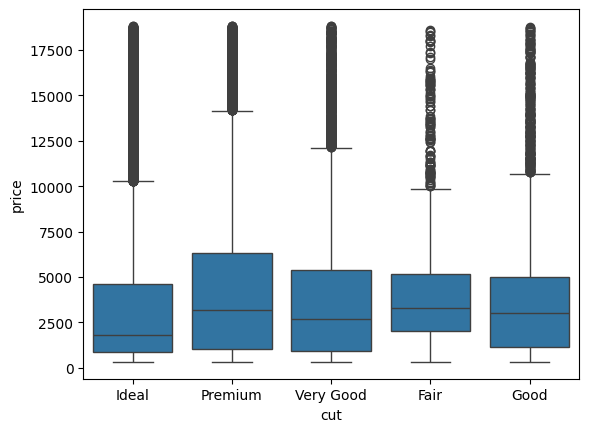

In [9]:
sns.boxplot(x="cut", y="price", data=train)
plt.show()

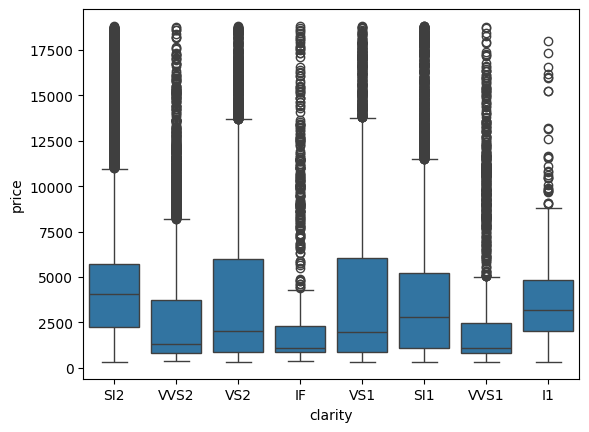

In [10]:
sns.boxplot(x="clarity", y="price", data=train)
plt.show()

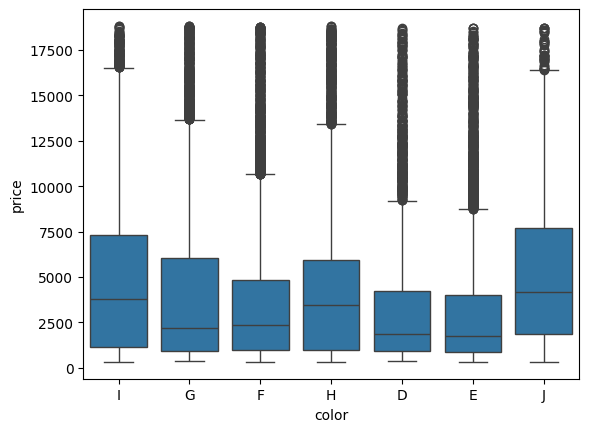

In [11]:
sns.boxplot(x="color", y="price", data=train)
plt.show()

<Axes: >

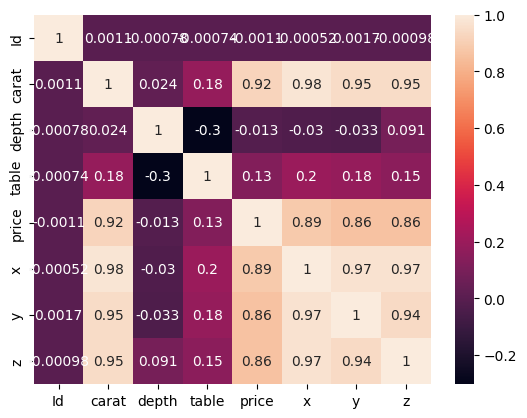

In [12]:
sns.heatmap(train.corr(numeric_only=True), annot=True)


# Clean Data

X, Y, Z are connected features so we will replace them with one feature called volume

In [13]:
train['volume']=train['x'] * train['y'] * train['z']
train=train.drop(['x','y','z'], axis=1)

test['volume']= test['x'] * test['y'] * test['z']
test=test.drop(['x','y','z'], axis=1)

replace the strings with numbers in the features

In [14]:
print(train["cut"].unique())
print(train["color"].unique())
print(train["clarity"].unique())

['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
['I' 'G' 'F' 'H' 'D' 'E' 'J']
['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


In [15]:
new_cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
new_color = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
new_clarity = {'I1':0 , 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7 }

In [16]:
#train
train['cut']=train['cut'].map(new_cut)
train['color']=train['color'].map(new_color)
train['clarity']=train['clarity'].map(new_clarity)

#test
test['cut']= test['cut'].map(new_cut)
test['color'] = test['color'].map(new_color)
test['clarity']=test['clarity'].map(new_clarity)

In [17]:
train.sample()

,Id,carat,cut,color,clarity,depth,table,price,volume
31724,31725,1.01,2,3,2,63.0,57.0,4890,158.71444


# Select Model

In [18]:
X = train.drop(['price'], axis=1)
y= train['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X ,y,test_size=0.2, random_state=42)

In [20]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_ra = regr.predict(X_test)

In [22]:
regr_mse = mean_squared_error(y_test, y_pred_ra)
regr_rmse=np.sqrt(regr_mse)
regr_rmse

1203.2520492316194

In [23]:
ran_model = RandomForestRegressor()
ran_model.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
y_pred = ran_model.predict(X_test)

In [25]:
ran_model_mse = mean_squared_error(y_test, y_pred)
ran_model_rmse=np.sqrt(ran_model_mse)
ran_model_rmse

537.5774366403509

In [26]:
Id = test['Id']
pred = ran_model.predict(test)
data = {'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)

In [27]:
sub.to_csv('sub.csv',index=False)